In [1]:
import pandas as pd
### 시각화를 위한 라이브러리
# - 파이썬 시각화에서 가장 기본적인 시각화 라이브러리
import matplotlib.pyplot as plt

### 한글처리
from matplotlib import font_manager, rc

### 운영체제 확인 라이브러리
import platform

### 시각화 시 마이너스(-, 음수) 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

### OS별 한글처리
# - 윈도우 운영체게
if platform.system() == "Windows" :
    # path = "c:/Windows/Fonts/malgun.ttf"
    # font_name = font_manager.FontProperties(fname=path).get_name()
    # rc("font", family = font_name)
    
    ### 또는 아래처럼 한줄로도 가능 (아래 한글처리를 주로 사용합니다.)
    plt.rc("font", family = "Malgun Gothic")

# - Mac 운영체제
elif platform.system() == "Darwin" :
    rc("font", family = "AppleGothic")
    
else :
    print("넌 누구?")

In [2]:
cn7 = pd.read_csv("./data/labeled_data.csv")
cn7 = cn7.drop(columns=["_id", "TimeStamp","PART_FACT_PLAN_DATE", "PART_FACT_SERIAL",
                        "EQUIP_NAME", "EQUIP_CD", "Reason", "Clamp_Open_Position",
                        "Mold_Temperature_1","Mold_Temperature_2","Mold_Temperature_5","Mold_Temperature_6",
                        "Mold_Temperature_7","Mold_Temperature_8","Mold_Temperature_9","Mold_Temperature_10",
                        "Mold_Temperature_11","Mold_Temperature_12","Barrel_Temperature_7","Switch_Over_Position"])
cn7 = cn7[(cn7["PART_NAME"] =="CN7 W/S SIDE MLD'G RH") | (cn7["PART_NAME"] =="CN7 W/S SIDE MLD'G LH")]
cn7 = cn7.drop(columns=["PART_NAME"])
cn7 = cn7.replace("Y", 1).replace("N", 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10268\3887624601.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cn7 = cn7.replace("Y", 1).replace("N", 0)


In [3]:
def remove_outliers(df, column):
    # 1사분위수(Q1)와 3사분위수(Q3) 계산
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # IQR 계산
    IQR = Q3 - Q1
    
    # 이상치 범위 설정
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 제거
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

In [4]:
cn7_pass = cn7[cn7["PassOrFail"] == 1]
cn7_fail = cn7[cn7["PassOrFail"] == 0]
cn7_pass_removed = cn7_pass.copy()
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Injection_Time')
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Plasticizing_Time')
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Cycle_Time')
cn7_removed = pd.concat([cn7_pass_removed, cn7_fail], ignore_index=True)


In [5]:
cn7_removed

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Max_Injection_Speed,Max_Screw_RPM,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,1,9.59,4.47,16.920000,59.520000,7.13,653.409973,68.849998,55.400002,30.700001,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.5
1,1,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,55.299999,30.799999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2,1,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,55.299999,30.799999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
3,1,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,55.299999,31.000000,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
4,1,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,55.299999,31.000000,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,0,9.98,4.87,16.530001,60.459999,7.12,653.409973,68.610001,49.400002,30.700001,...,67.400002,276.000000,275.299988,275.100006,271.600006,255.199997,229.600006,65.000000,20.700001,22.0
6632,0,9.98,4.87,16.530001,60.459999,7.12,653.409973,68.610001,49.400002,30.700001,...,67.400002,276.000000,275.299988,275.100006,271.600006,255.199997,229.600006,65.000000,20.700001,22.0
6633,0,9.70,4.58,16.469999,58.959999,7.12,653.450012,68.589996,53.299999,30.500000,...,60.200001,276.799988,275.100006,275.700012,270.899994,255.399994,229.399994,64.500000,20.600000,21.9
6634,0,9.70,4.58,16.469999,58.959999,7.12,653.450012,68.589996,53.299999,30.500000,...,60.200001,276.799988,275.100006,275.700012,270.899994,255.399994,229.399994,64.500000,20.600000,21.9


In [6]:
cn7_removed["PassOrFail"].value_counts()

PassOrFail
1    6597
0      39
Name: count, dtype: int64

### 불량데이터를 양품의 70%정도로 증강

In [7]:
from sklearn.utils import resample

# 불량 데이터(클래스 0)와 양품 데이터(클래스 1) 분리
cn7_removed_negative = cn7_removed[cn7_removed['PassOrFail'] == 0]  # 불량 데이터
cn7_removed_positive = cn7_removed[cn7_removed['PassOrFail'] == 1]  # 양품 데이터

# 증강 전 클래스 분포 확인
before_cn7_removed_negative_count = len(cn7_removed_negative)
before_cn7_removed_positive_count = len(cn7_removed_positive)

print(f"증강 전 양품 데이터 개수: {before_cn7_removed_positive_count}")
print(f"증강 전 불량 데이터 개수: {before_cn7_removed_negative_count}")
print("============================")

# 목표 불량 데이터 개수 (양품 데이터의 70% 수준으로 설정)
target_defective_count = int(before_cn7_removed_positive_count * 0.7)

# 랜덤 오버샘플링 수행 (불량 데이터를 증강)
oversampled_negative_data = resample(
    cn7_removed_negative,
    replace=True,
    n_samples=target_defective_count,  # 목표 불량 데이터 개수로 증강
    random_state=42
)

# 증강된 불량 데이터와 기존 양품 데이터를 병합
oversample_data = pd.concat([cn7_removed_positive, oversampled_negative_data])

# 증강 후 클래스 분포 확인
augmented_defective_count = len(oversampled_negative_data)
augmented_non_defective_count = len(cn7_removed_positive)

print(f"증강 후 양품 데이터 개수: {augmented_non_defective_count}")
print(f"증강 후 불량 데이터 개수: {augmented_defective_count}")

증강 전 양품 데이터 개수: 6597
증강 전 불량 데이터 개수: 39
증강 후 양품 데이터 개수: 6597
증강 후 불량 데이터 개수: 4617


In [8]:
# 과하게 증강하면 과적합 나타날 수도 있음 ==> 양품의 70%만 증강

In [30]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


grid_df = pd.DataFrame()

# 독립변수 종속변수 분리 
y = cn7_removed["PassOrFail"]
X = cn7_removed.drop(columns=["PassOrFail"])

# 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("증강 전")
print(X_train.shape, y_train.shape)
print("====================================")
# 증강 전 클래스 분포 확인
before_cn7_removed_negative_count = len(cn7_removed_negative)
before_cn7_removed_positive_count = len(cn7_removed_positive)

print(f"증강 전 양품 데이터 개수: {before_cn7_removed_positive_count}")
print(f"증강 전 불량 데이터 개수: {before_cn7_removed_negative_count}")
print("============================")

# X_train, y_train 합치기
Xy_train = X_train.copy()
Xy_train["PassOrFail"] = y_train

# Average_Screw_RPM 기준으로 up만 추출하기
Xy_train = Xy_train[Xy_train["Average_Screw_RPM"] > 250]

print(" Average_Screw_RPM 기준으로 up만 추출 한 후 ")
print(X_train.shape, y_train.shape)
print("====================================")

# X_train, y_train 분리
X_train = Xy_train.drop(columns=["PassOrFail"])
y_train = Xy_train["PassOrFail"]


# 목표 불량 데이터 개수 (양품 데이터의 70% 수준으로 설정)
target_defective_count = int(before_cn7_removed_positive_count * 0.7)

# 랜덤 오버샘플링 수행 (불량 데이터를 증강)
oversampled_negative_data = resample(
    cn7_removed_negative,
    replace=True,
    n_samples=target_defective_count,  # 목표 불량 데이터 개수로 증강
    random_state=42
)

# 증강된 불량 데이터와 기존 양품 데이터를 병합
oversampled_data = pd.concat([cn7_removed_positive, oversampled_negative_data])

# 증강 후 데이터 분리
X_resampled = oversampled_data.drop(columns=["PassOrFail"])
y_resampled = oversampled_data["PassOrFail"]
# 증강 후 클래스 분포 확인
augmented_defective_count = len(oversampled_negative_data)
augmented_non_defective_count = len(cn7_removed_positive)

print(f"증강 후 양품 데이터 개수: {augmented_non_defective_count}")
print(f"증강 후 불량 데이터 개수: {augmented_defective_count}")


print("증강 후")
print(X_resampled.shape, y_resampled.shape)
print("====================================")



# 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print("증강 후 검증데이터로 분리")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

# 데이터 정규화
ss=StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_val_scaled = ss.transform(X_val)
X_test_scaled=ss.transform(X_test)

# 모델 생성
rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
hgb = HistGradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
model_list = [rf, et, gb, hgb, xgb]

# GridSearchCV 이용해서 모든 모델 하이퍼파라미터 튜닝
for model in model_list:
    model_name = model.__class__.__name__
    gridParams = dict()
    if model_name =="XGBClassifier" :
        gridParams["n_estimators"] = [20,50]
        gridParams["max_depth"] = [10,20]
        gridParams["min_child_weight"] = [1, 2,4]
    elif model_name == "HistGradientBoostingClassifier" :
        gridParams["max_iter"] = [20, 50]
        gridParams["max_depth"] = [10, 50]
        gridParams["min_samples_leaf"] = [1,2,4]
    else :
        gridParams["n_estimators"] = [20, 50]
        gridParams["max_depth"] = [10,20]
        gridParams["min_samples_split"] = [2,5,10]
        gridParams["min_samples_leaf"] = [1,2,4]

    grid_search_model = GridSearchCV(model, gridParams, scoring='f1', cv=5, n_jobs=-1)
    grid_search_model.fit(X_train_scaled, y_train)
    model = grid_search_model.best_estimator_
    train_pred = model.predict(X_train_scaled)
    val_pred = model.predict(X_val_scaled)
    
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    
    pre = precision_score(y_val, val_pred)
    rec = recall_score(y_val, val_pred)
    f1 = f1_score(y_val, val_pred)
    
    pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, pred)
    TN = cm[0, 0]  # True Negative
    FP = cm[0, 1]  # False Positive
    FN = cm[1, 0]  # False Negative
    TP = cm[1, 1]  # True Positive
    
    df_temp = pd.DataFrame([[model_name,  train_acc, val_acc, pre, rec, f1, train_acc-val_acc, TN, FP, FN, TP, str(grid_search_model.best_params_)]],
                             columns=["모델명", "훈련_정확도", "검증_정확도", "정밀도", "재현율", "f1-score", "훈련-검증", "TN", "FP", "FN", "TP", "파라미터"])

    grid_df = pd.concat([grid_df, df_temp], ignore_index=True)

grid_df

증강 전
(4645, 23) (4645,)
증강 전 양품 데이터 개수: 6597
증강 전 불량 데이터 개수: 39
 Average_Screw_RPM 기준으로 up만 추출 한 후 
(4645, 23) (4645,)
증강 후 양품 데이터 개수: 6597
증강 후 불량 데이터 개수: 4617
증강 후
(11214, 23) (11214,)
증강 후 검증데이터로 분리
(7849, 23) (7849,)
(1991, 23) (1991,)
(3365, 23) (3365,)


,모델명,훈련_정확도,검증_정확도,정밀도,재현율,f1-score,훈련-검증,TN,FP,FN,TP,파라미터
0,RandomForestClassifier,0.998981,0.996731,1.0,0.994503,0.997244,0.002250,16,0,8,1967,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_..."
1,ExtraTreesClassifier,0.999108,0.997028,1.0,0.995002,0.997495,0.002080,16,0,8,1967,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
2,GradientBoostingClassifier,0.999108,0.997623,1.0,0.996002,0.997997,0.001486,16,0,6,1969,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
3,HistGradientBoostingClassifier,0.999108,0.997028,1.0,0.995002,0.997495,0.002080,16,0,8,1967,"{'max_depth': 50, 'max_iter': 50, 'min_samples..."
4,XGBClassifier,0.999108,0.996434,1.0,0.994003,0.996992,0.002674,16,0,9,1966,"{'max_depth': 10, 'min_child_weight': 1, 'n_es..."


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, val_pred)
cm

array([[1364,    0],
       [  12, 1989]], dtype=int64)

In [11]:
test_pred = model.predict(X_test_scaled)

test_acc = accuracy_score(y_test, test_pred)
test_pre = precision_score(y_test, test_pred)
test_rec = recall_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)

print(f"테스트 정확도: {test_acc}")
print(f"테스트 정밀도: {test_pre}")
print(f"테스트 재현율: {test_rec}")
print(f"테스트 f1-score: {test_f1}")

테스트 정확도: 0.9954796584630838
테스트 정밀도: 1.0
테스트 재현율: 0.9954430379746836
테스트 f1-score: 0.9977163156559249


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_pred)
cm

array([[  16,    0],
       [   9, 1966]], dtype=int64)

In [13]:
# tmp_re = X_resampled.copy()
# tmp_re["PassOrFail"] = y_resampled

# # 그래프 설정
# fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
# axes = axes.flatten()
# fig.suptitle("랜덤오버샘플링 70% 진행한 후 불량, 양품 분포", fontsize=25)

# # 독립 변수별 산점도 생성
# for i, column in enumerate(X.columns):
#     ax = axes[i]
#     ax.scatter(tmp_re.index[y_resampled == 1], tmp_re[column][y_resampled == 1], label="Pass", color="blue", alpha=0.6, s=10)
#     ax.scatter(tmp_re.index[y_resampled == 0], tmp_re[column][y_resampled == 0], label="Fail", color="red", alpha=0.6, s=10)
#     ax.set_title(column)
#     ax.set_xlabel("Index")
#     ax.set_ylabel("Value")
#     ax.legend()

# # 빈 그래프 제거
# for j in range(len(X.columns), len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()

In [14]:
# plt.savefig("scatter_plot.png", dpi=300)  # 이미지 저장 (파일명: scatter_plot.png)

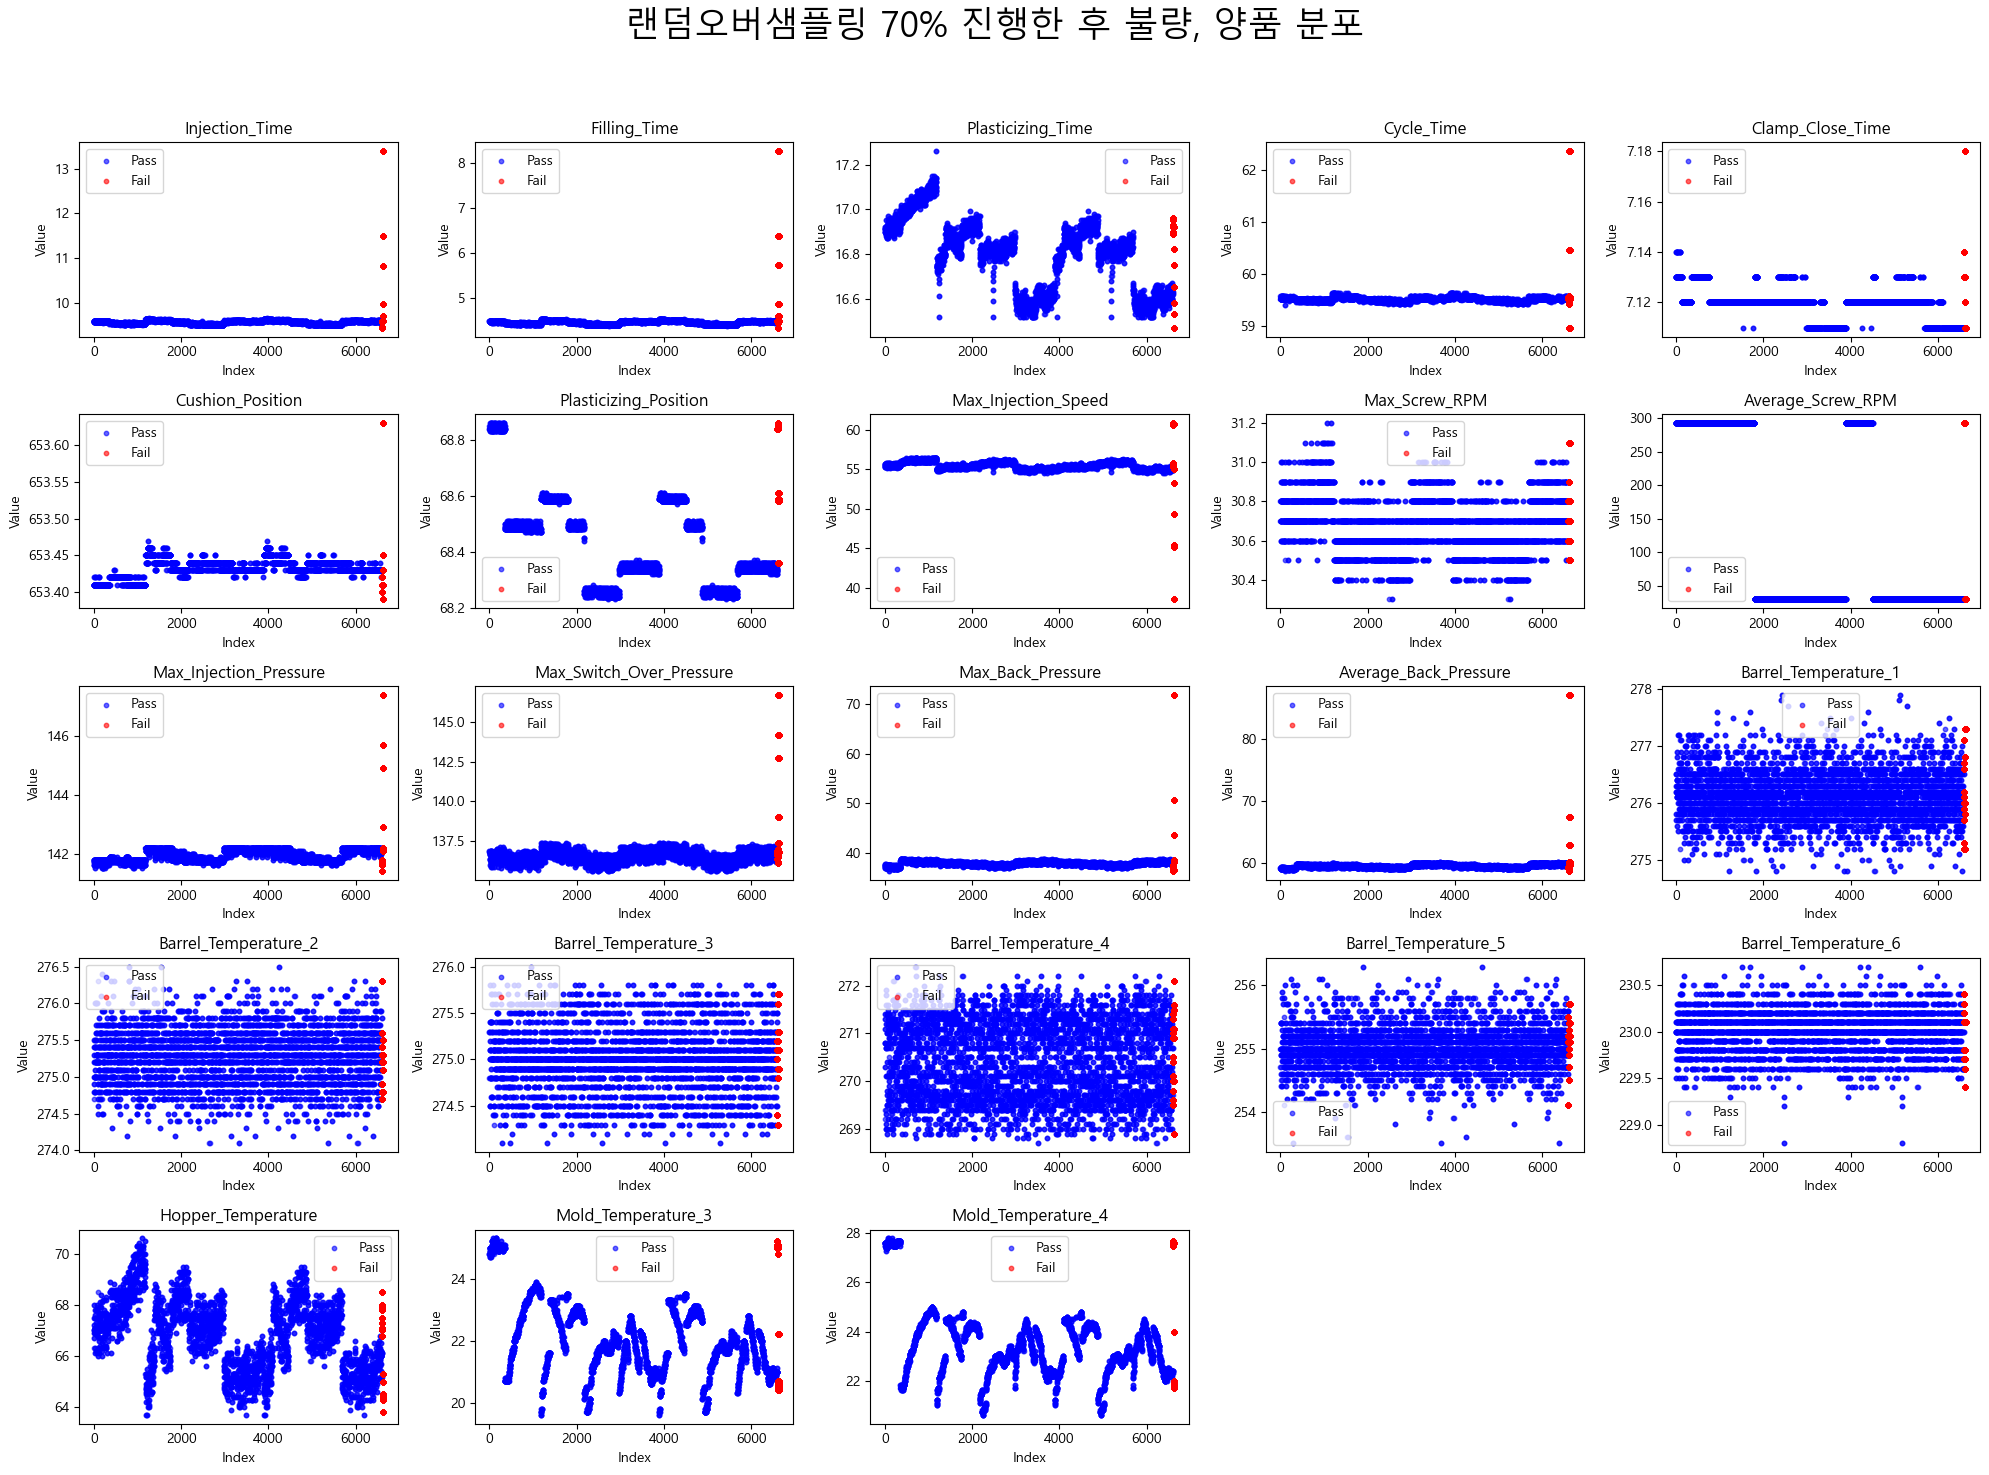

In [15]:
tmp_re = X_resampled.copy()
tmp_re["PassOrFail"] = y_resampled

# 그래프 설정
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle("랜덤오버샘플링 70% 진행한 후 불량, 양품 분포", fontsize=25)

# 독립 변수별 산점도 생성
for i, column in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(tmp_re.index[y_resampled == 1], tmp_re[column][y_resampled == 1], label="Pass", color="blue", alpha=0.6, s=10)
    ax.scatter(tmp_re.index[y_resampled == 0], tmp_re[column][y_resampled == 0], label="Fail", color="red", alpha=0.6, s=10)
    ax.set_title(column)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()

# 빈 그래프 제거
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

# 레이아웃 조정 및 저장
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("scatter_plot.png", dpi=300)  # 이미지 저장
plt.show()  # 화면 출력


In [16]:
X_resampled.shape

(11214, 23)

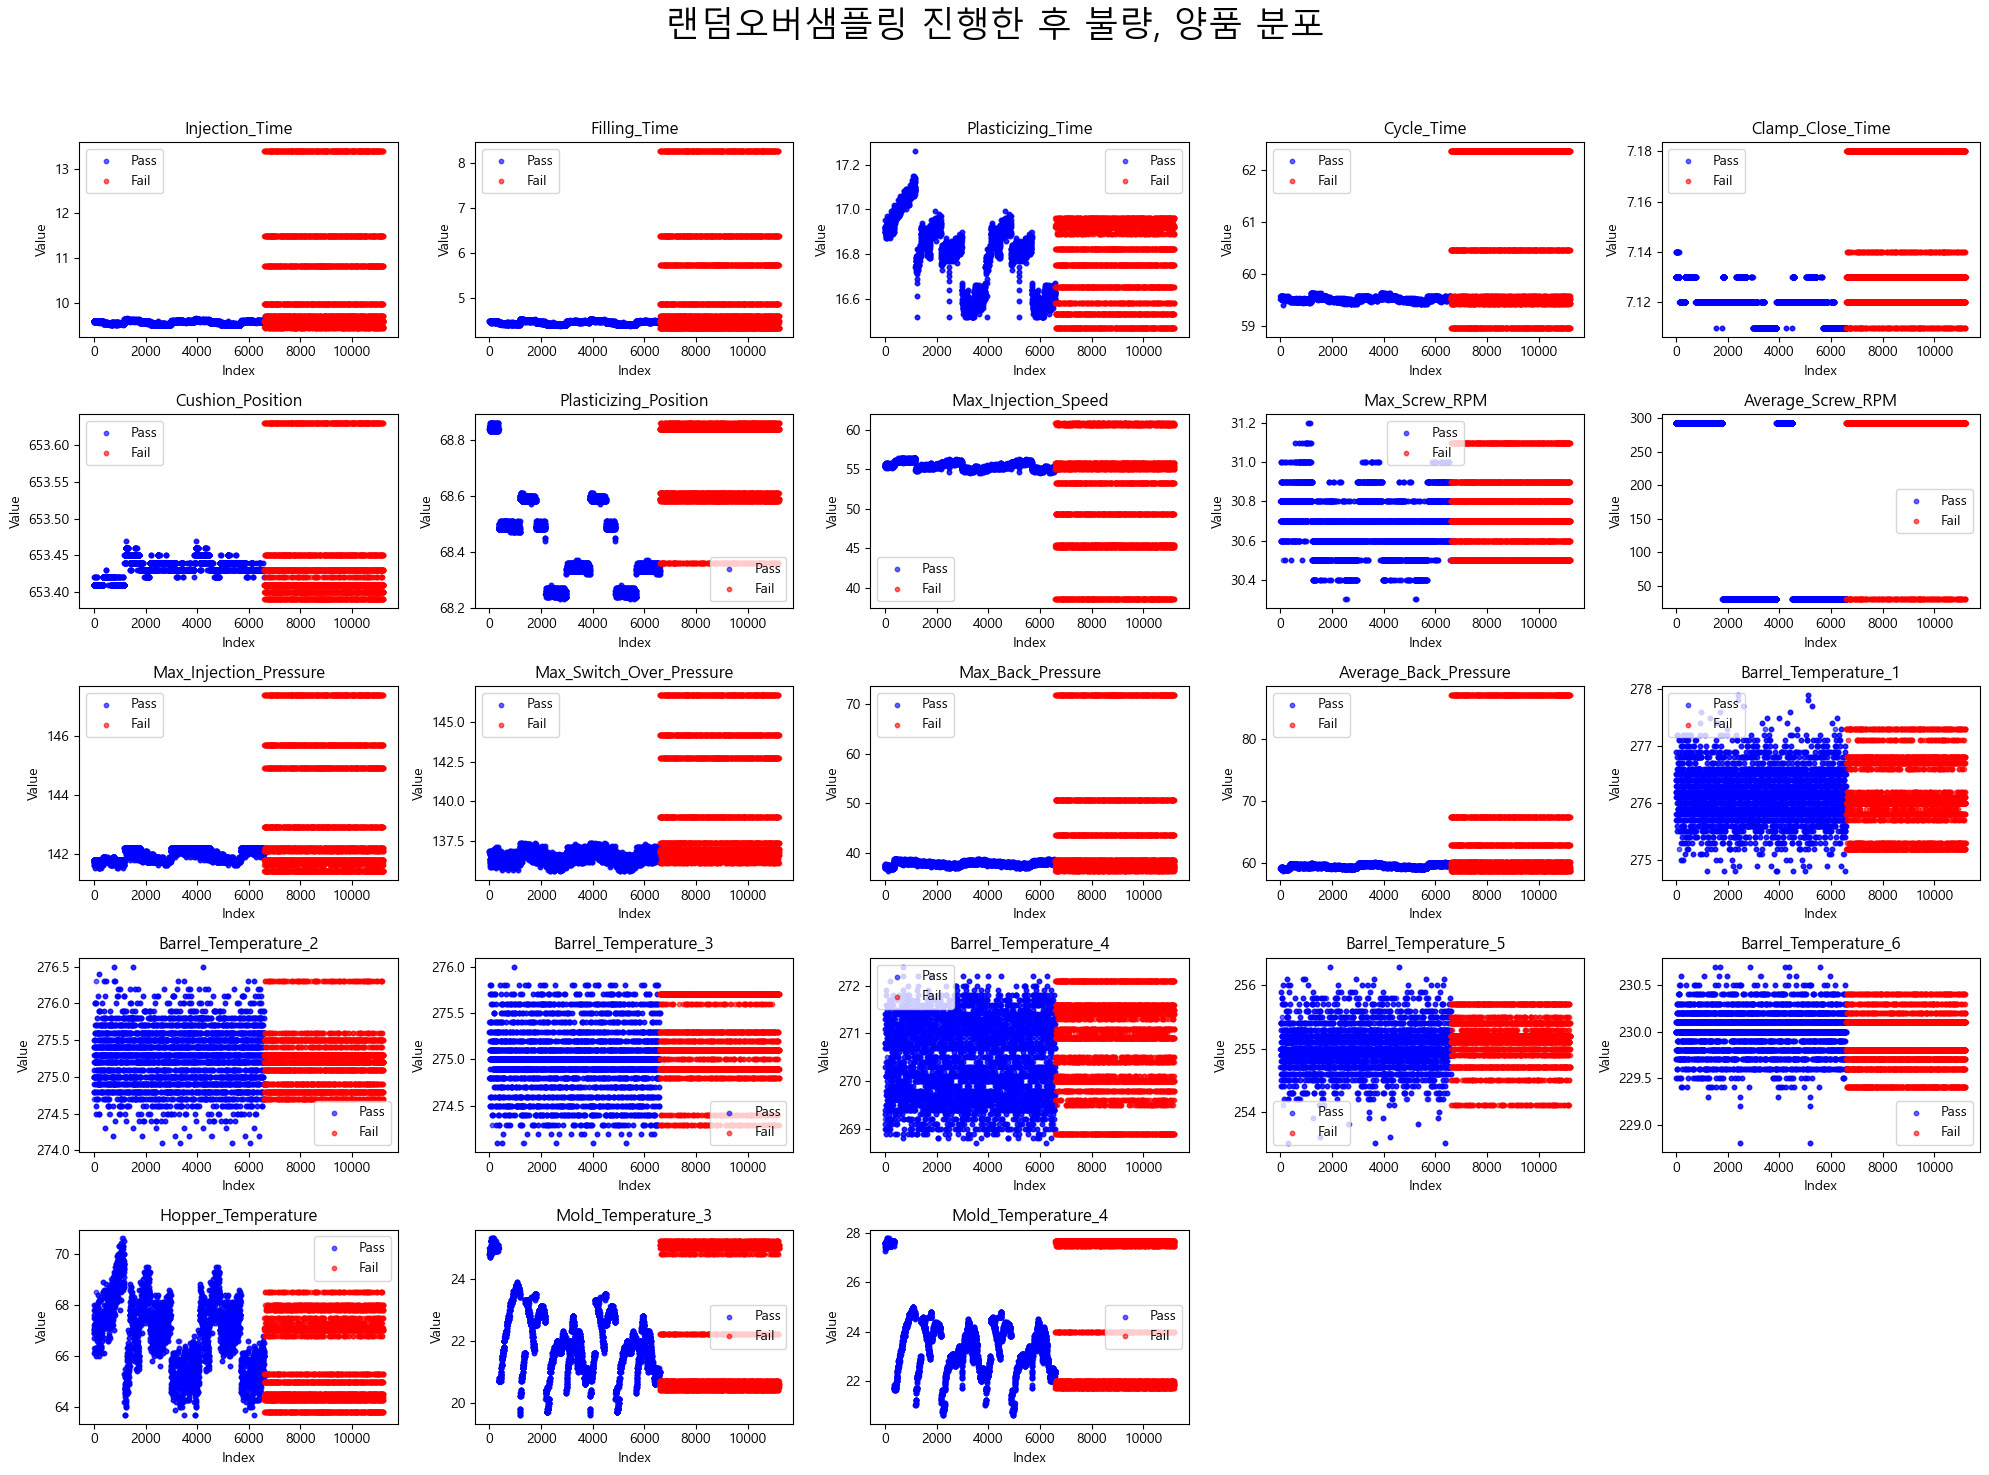

In [27]:
tmp_re = X_resampled.copy()
tmp_re["PassOrFail"] = y_resampled

tmp_y = y_resampled.reset_index(drop=True)
tmp_re = tmp_re.reset_index(drop=True)

# 그래프 설정
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle("랜덤오버샘플링 진행한 후 불량, 양품 분포", fontsize=25)

# 독립 변수별 산점도 생성
for i, column in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(tmp_re.index[tmp_y == 1], tmp_re[column][tmp_y == 1], label="Pass", color="blue", alpha=0.6, s=10)
    ax.scatter(tmp_re.index[tmp_y == 0], tmp_re[column][tmp_y == 0], label="Fail", color="red", alpha=0.6, s=10)
    ax.set_title(column)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()

# 빈 그래프 제거
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

# 레이아웃 조정 및 저장
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("scatter_plot.png", dpi=300)  # 이미지 저장
plt.show()  # 화면 출력


In [18]:
tmp_re.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       6613, 6618, 6634, 6631, 6612, 6604, 6613, 6613, 6622, 6609],
      dtype='int64', length=11214)